### 3-1. 머신러닝 결과 확인
- 2-1, 2-2에서 정제한 기후데이터를 바탕으로, 단순히 모델에 적용해서 예측값 확인.
- 결과값을 바탕으로 본격적으로 분석할 채소 분류.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import os

from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost

from sklearn.ensemble import VotingRegressor

from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [7]:
def get_climate_data(vege) :
    dome = False
    fore = False
    if f'{vege}_na.csv' in os.listdir('./data/climate_final/국내') :
        climate_domestic = pd.read_csv(f'./data/climate_final/{vege}_na.csv',
                                             index_col = 0,
                                             parse_dates = True,
                                             encoding = 'cp949')
        dome = True
    if f'{vege}_for.csv' in os.listdir('./data/climate_final/해외') :
        climate_foreign = pd.read_csv(f'./data/climate_final/해외/{vege}_for.csv',
                                         index_col = 0,
                                         parse_dates = True,
                                         encoding = 'cp949')
        fore = True
    if dome and fore :
        merged_climate = pd.merge(climate_foreign, climate_domestic, left_index = True, right_index = True)
        return merged_climate.loc['2011':]
    elif dome :
        return climate_domestic.loc['2011':]
    else :
        return climate_foreign.loc['2011':]

In [8]:
def get_price_data(vege, anually = False, rank = '중품'):
    if vege == '마늘' :
        vege = '피' + vege
    elif vege == '고추':
        vege = '풋' + vege
    prices = pd.read_csv('./data/vegetable_price.csv',
                               index_col = 1,
                               parse_dates = True,
                               encoding = 'cp949')
    price_columns = ['Name', 'SubCategory', 'Rank', 'Category', 'Price']
    prices.drop(['Unnamed: 0'], axis = 1, inplace = True)
    prices.columns = price_columns
    prices = prices.sort_values('0')
    if anually :
        df = prices[(prices.Name == vege) & (prices.Category == '평년') & (prices.Rank == rank)]
        return df['2011':]
    else :
        df = prices[(prices.Name == vege) & (prices.Category == '전국평균') & (prices.Rank == rank)]
        return df['2011':]

In [9]:
null_breaker = {
    '양배추' : ['172' ,'177', '268'],
    '배추' : ['172', '177', '268'],
    '무' : ['172'],
    '쌀' : ['48378', '48400', '59431']
}

==============================쌀==============================
-----------------------------------------
KNeighborsRegressor
train: 0.37387777497238417
test: -9.006670825084896

explained_variance_score: -0.48059216334579036
mean_squared_error: 150385520.70657507
r2_score: -9.006670825084896
-----------------------------------------
LinearRegression
train: 0.8804956033336491
test: -5.301613080534841

explained_variance_score: -2.0475046494044813
mean_squared_error: 94703961.08483529
r2_score: -5.301613080534841
-----------------------------------------
Ridge
train: 0.7506764068607915
test: -4.298400810999319

explained_variance_score: -0.46735478677393405
mean_squared_error: 79627158.60272263
r2_score: -4.298400810999319
-----------------------------------------
Lasso
train: 0.7538505262515439
test: -3.652252883879889

explained_variance_score: -0.34229433084193506
mean_squared_error: 69916507.1611124
r2_score: -3.652252883879889
-----------------------------------------
ElasticNet
trai

explained_variance_score: -0.24840841134964808
mean_squared_error: 211149175.66241413
r2_score: -0.2900567402501655
-----------------------------------------
LinearRegression
train: 0.16951302131603985
test: -0.001880813456394126

explained_variance_score: -0.0010917758969000158
mean_squared_error: 163982173.2432357
r2_score: -0.001880813456394126
-----------------------------------------
Ridge
train: 0.15650399230860357
test: -0.043292739288433024

explained_variance_score: -0.025953860958215058
mean_squared_error: 170760242.55539045
r2_score: -0.043292739288433024
-----------------------------------------
Lasso
train: 0.15853586971312283
test: -0.04386695620335179

explained_variance_score: -0.025297478077886737
mean_squared_error: 170854227.1255676
r2_score: -0.04386695620335179
-----------------------------------------
ElasticNet
train: 0.06325854896493721
test: -0.08560953612447064

explained_variance_score: -0.013177787000055119
mean_squared_error: 177686416.02499345
r2_score: -0

train: 0.37360631729387483
test: 0.3751640693538555

explained_variance_score: 0.3811539819470767
mean_squared_error: 139300042.15270457
r2_score: 0.3751640693538555
-----------------------------------------
ElasticNet
train: 0.24524291152564115
test: 0.27182113359242666

explained_variance_score: 0.3098094117447838
mean_squared_error: 162339170.66899312
r2_score: 0.27182113359242666
-----------------------------------------
RandomForestRegressor
train: 0.9307074674874485
test: 0.41901508603577664

explained_variance_score: 0.44000838427857636
mean_squared_error: 129523958.26790972
r2_score: 0.41901508603577664
-----------------------------------------
GradientBoostingRegressor
train: 0.6782601191083153
test: 0.41434873949376605

explained_variance_score: 0.4408339189834949
mean_squared_error: 130564266.99236001
r2_score: 0.41434873949376605
-----------------------------------------
XGBRegressor
train: 0.9941081324803374
test: 0.35438152361753694

explained_variance_score: 0.3753856455

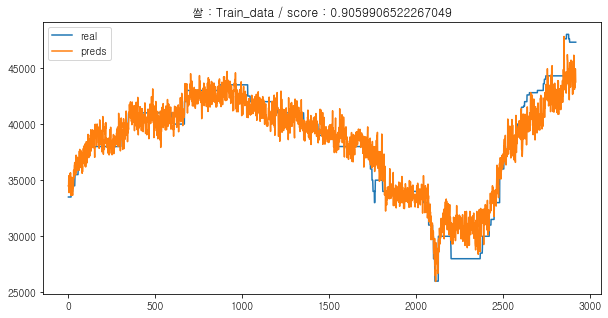

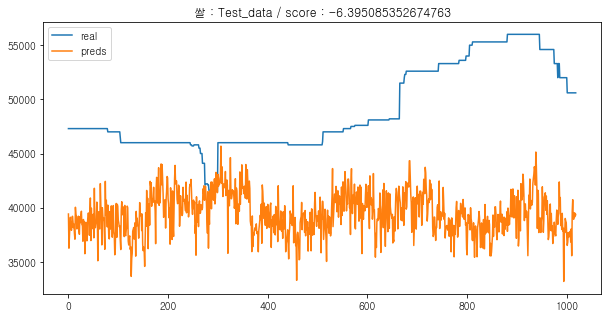

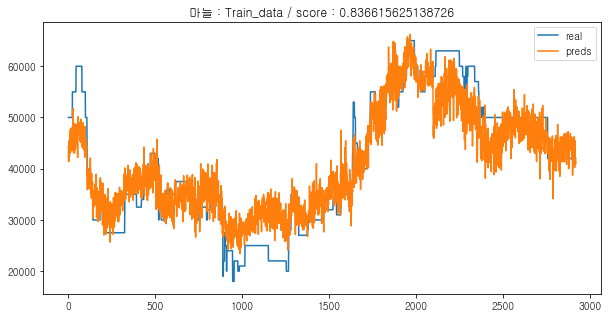

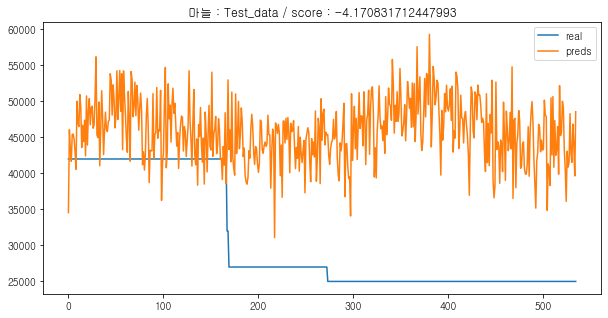

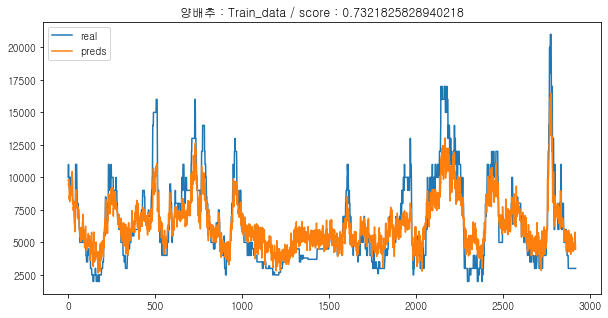

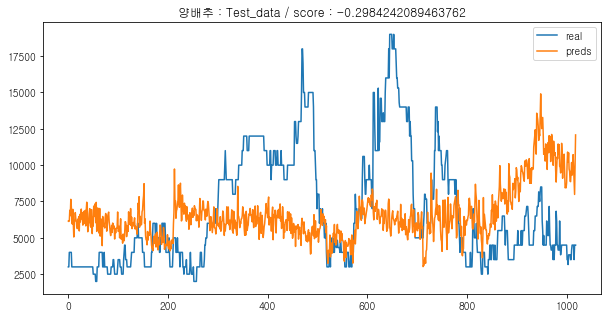

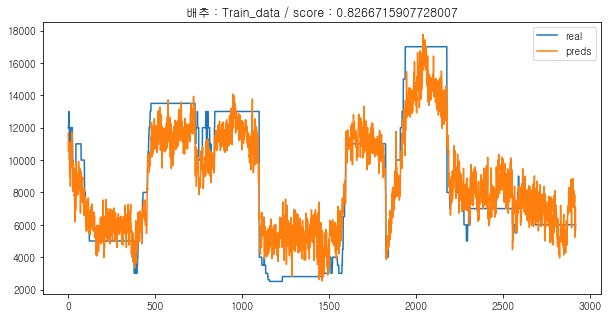

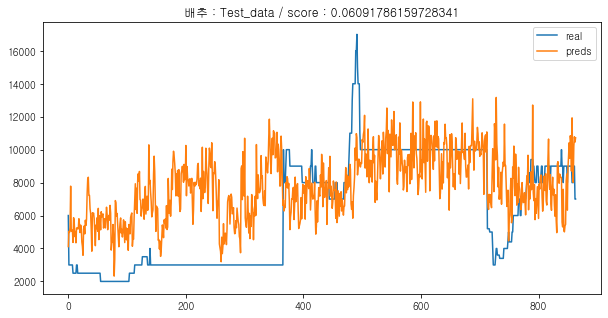

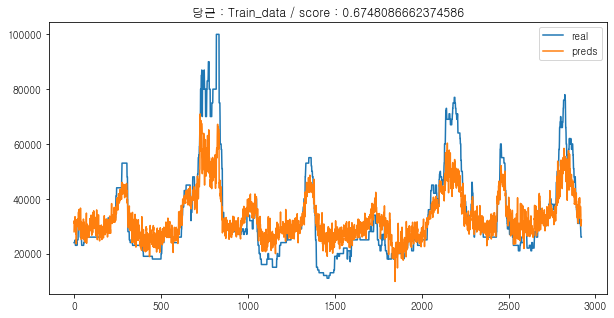

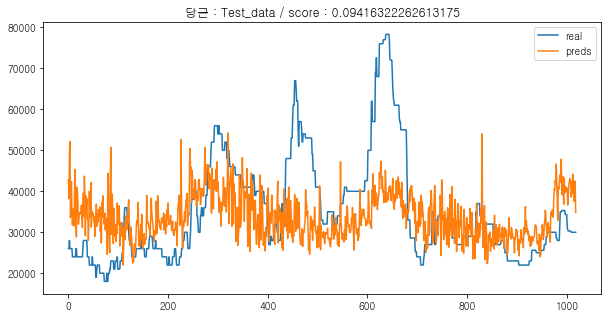

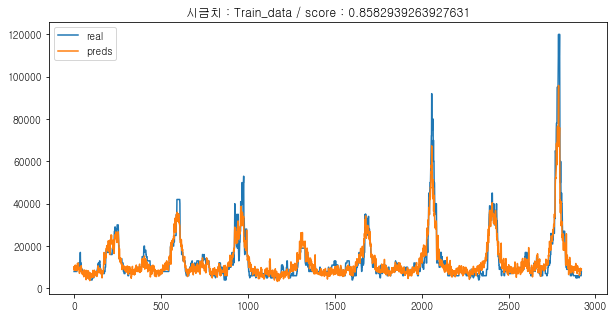

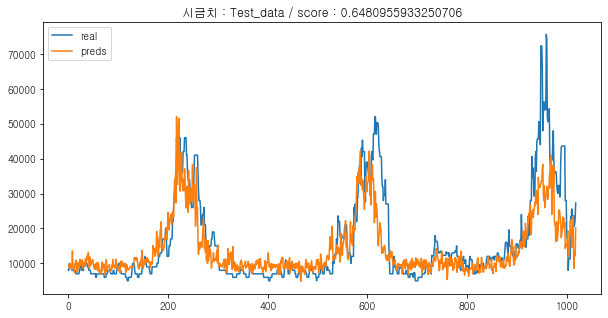

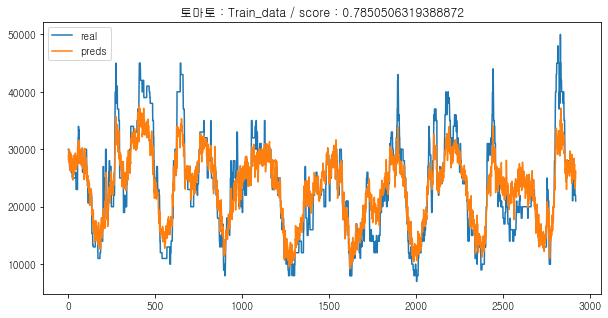

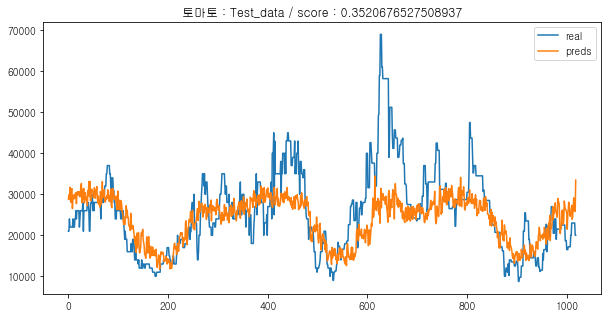

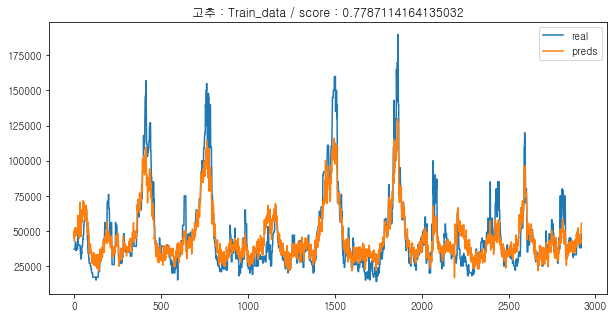

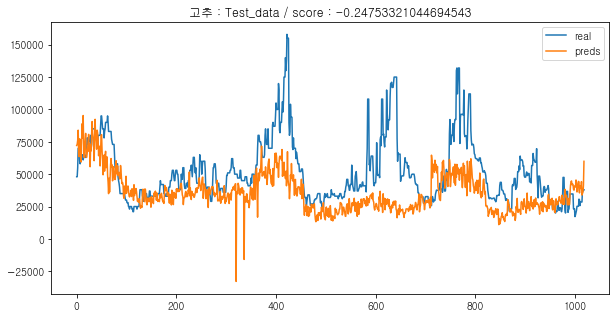

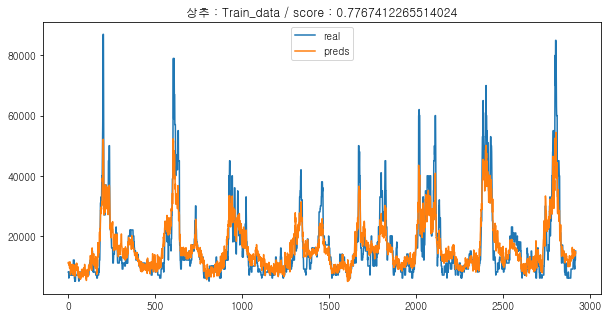

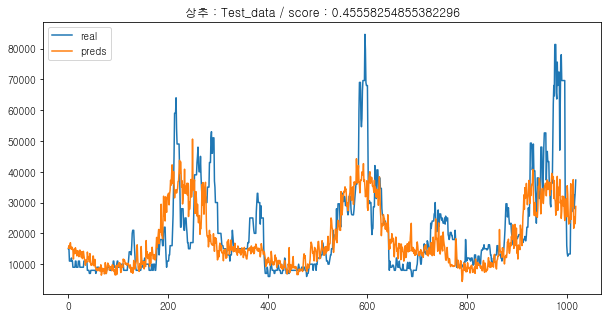

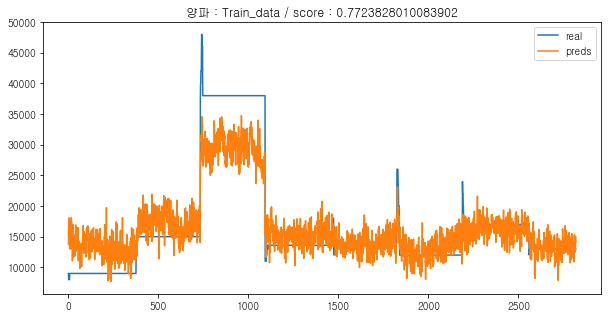

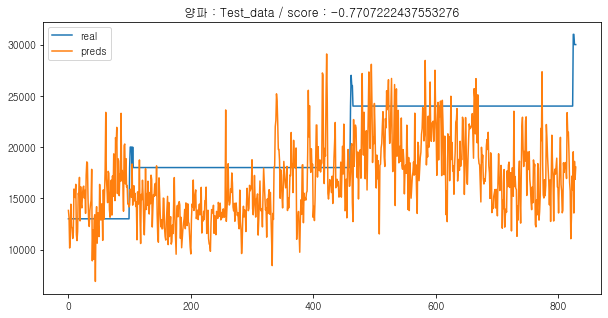

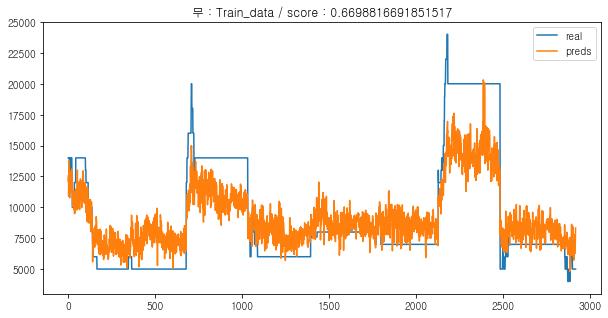

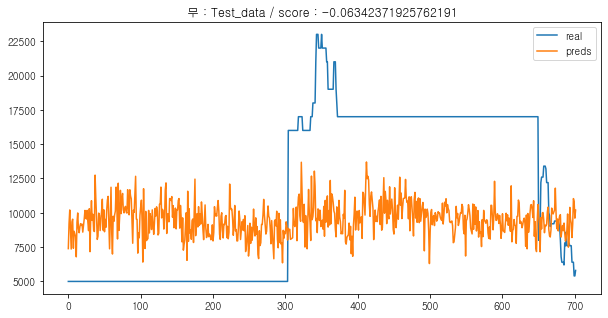

In [17]:
vege_list = ['쌀', '마늘', '양배추', '배추', '당근', '시금치', '토마토', '고추', '상추', '양파', '무']

for vege_name in vege_list :
    
    print(f"=============================={vege_name}==============================")
    
    climate_df = get_climate_data(vege_name)
    price_df = get_price_data(vege_name)

    if vege_name in null_breaker.keys():
        dead_column = []
        for column in climate_df.columns :

            for eliminate in null_breaker[vege_name] :
                if eliminate in column :
                    dead_column.append(column)
        climate_df.drop(dead_column, axis = 1, inplace = True)
        
    climate_df['month'] = climate_df.index.month
    if vege_name == '상추' :
        price_df = price_df[price_df.SubCategory == '적상추']
        
    merged_df = pd.concat([climate_df.loc[price_df.index[0] : price_df.index[-1]], price_df.Price], axis = 1).ffill()
    
    X = merged_df.drop('Price', axis = 1)
    y = merged_df.Price
    
    X_train = X.loc[:'2018-12-31', :]
    y_train = y.loc[:'2018-12-31']
    
    X_test = X.loc['2019-1-1':, :]
    y_test = y.loc['2019-1-1':]
    
    scaler = RobustScaler()
    scaler.fit(X)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    knn = KNeighborsRegressor()
    linear = LinearRegression()
    ridge = Ridge()
    lasso = Lasso()
    eln = ElasticNet()
    lr = LogisticRegression()
    rfc = RandomForestRegressor()
    gbr = GradientBoostingRegressor()
    xgb = xgboost.XGBRegressor()
    
    models = [knn, linear, ridge, lasso, eln, rfc, gbr, xgb]
    
    for model in models :
        print('-----------------------------------------')
        print(type(model).__name__)
        model.fit(X_train_scaled, y_train)
        print('train:', model.score(X_train_scaled, y_train))
        print('test:', model.score(X_test_scaled, y_test))
        print()
        y_preds = model.predict(X_test_scaled)
        print('explained_variance_score:', explained_variance_score(y_test, y_preds))
        print('mean_squared_error:', mean_squared_error(y_test, y_preds))
        print('r2_score:', r2_score(y_test, y_preds))
        
    voting = VotingRegressor([('ridge', ridge), ('lasso', lasso), ('rfc', rfc), ('gbr', gbr), ('xgb', xgb)])
    voting.fit(X_train_scaled, y_train)
    
    train_score = voting.score(X_train_scaled, y_train)
    test_score = voting.score(X_test_scaled, y_test)
    print(f"""
    -------------------------
    | voting Score
    | train = {train_score}
    | test = {test_score} 
    -------------------------""")
          
    y_preds = voting.predict(X_train_scaled)
    plt.figure(figsize = (10, 5))
    plt.plot(y_train.values, label = 'real')
    plt.plot(y_preds, label = 'preds')
    plt.title(f'{vege_name} : Train_data / score : {train_score}')
    plt.legend()
    plt.savefig(f'./image/머신러닝/{vege_name}_train.png')
    
    y_preds = voting.predict(X_test_scaled)
    plt.figure(figsize = (10, 5))
    plt.plot(y_test.values, label = 'real')
    plt.plot(y_preds, label = 'preds')
    plt.title(f'{vege_name} : Test_data / score : {test_score}')
    plt.legend()
    plt.savefig(f'./image/머신러닝/{vege_name}_test.png')